In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [4]:
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

In [5]:
def build_model(seed = 2024):

    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])


def build_and_train_model(optimizer):

    model = build_model()
    model.compile(
        loss = 'sparse_categorical_crossentropy',
        optimizer = optimizer,
        metrics = ['accuracy']
    )

    return model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

In [6]:
def plot_loss(history, num_epochs):
    plt.figure(figsize=(8, 5))
    for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
        epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
        plt.plot(epochs, history.history[key], style, label=key)
    plt.xlabel("Epoch")
    plt.axis([-0.5, num_epochs - 1, 0., 1])
    plt.legend(loc="lower left")
    plt.grid()
    plt.show()

# 1. Power Scheduling

In [9]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.01,
    decay_steps=10_000,
    decay_rate=1.0,
    staircase=False
)

In [10]:
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [11]:
history_power_scheduling = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 0.6848 - accuracy: 0.7677 - val_loss: 0.4933 - val_accuracy: 0.8268
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4722 - accuracy: 0.8345 - val_loss: 0.4891 - val_accuracy: 0.8156
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4275 - accuracy: 0.8492 - val_loss: 0.4092 - val_accuracy: 0.8562
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4000 - accuracy: 0.8581 - val_loss: 0.3967 - val_accuracy: 0.8594
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3820 - accuracy: 0.8634 - val_loss: 0.4085 - val_accuracy: 0.8502
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3686 - accuracy: 0.8686 - val_loss: 0.3779 - val_accuracy: 0.8698
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3582 - accuracy: 0.8724 - val_loss: 0.3689 - val_accuracy

Demo of power scheduling with and without staircase 

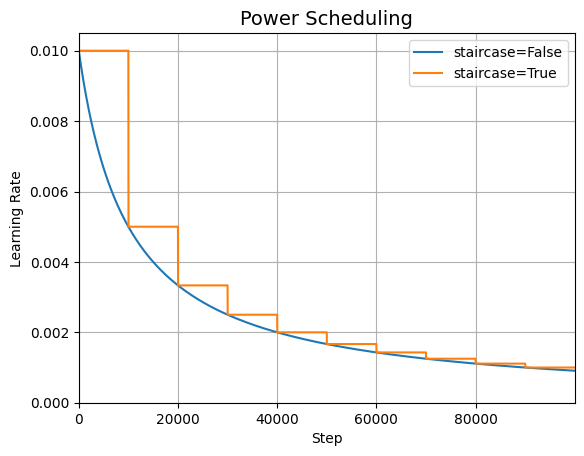

In [12]:
initial_learning_rate = 0.01
decay_rate = 1.0
decay_steps = 10_000

steps = np.arange(100_000)
lrs = initial_learning_rate / (1 + decay_rate * steps / decay_steps)
lrs2 = initial_learning_rate / (1 + decay_rate * np.floor(steps / decay_steps))

plt.plot(steps, lrs,  "-", label="staircase=False")
plt.plot(steps, lrs2,  "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# 2. Exponential Scheduling

In [13]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=20_000,
    decay_rate=0.1,
    staircase=False
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [14]:
history_exponential_scheduling = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 0.6973 - accuracy: 0.7615 - val_loss: 0.5076 - val_accuracy: 0.8210
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4706 - accuracy: 0.8341 - val_loss: 0.4732 - val_accuracy: 0.8222
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4267 - accuracy: 0.8502 - val_loss: 0.4103 - val_accuracy: 0.8504
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4015 - accuracy: 0.8585 - val_loss: 0.4015 - val_accuracy: 0.8582
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3854 - accuracy: 0.8640 - val_loss: 0.4061 - val_accuracy: 0.8558
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3740 - accuracy: 0.8673 - val_loss: 0.3824 - val_accuracy: 0.8642
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3653 - accuracy: 0.8720 - val_loss: 0.3711 - val_accurac

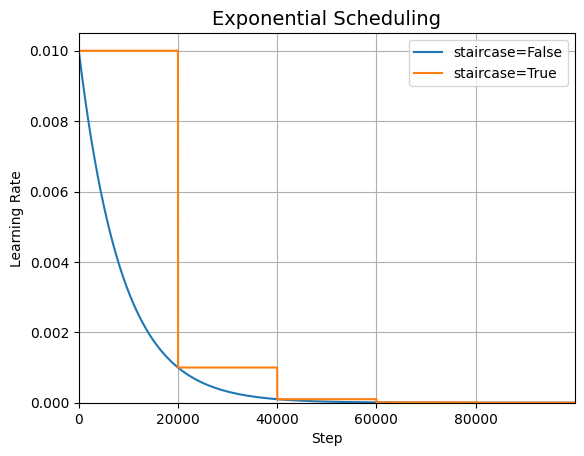

In [16]:
# extra code – this cell plots exponential scheduling

initial_learning_rate = 0.01
decay_rate = 0.1
decay_steps = 20_000

steps = np.arange(100_000)
lrs = initial_learning_rate * decay_rate ** (steps / decay_steps)
lrs2 = initial_learning_rate * decay_rate ** np.floor(steps / decay_steps)

plt.plot(steps, lrs,  "-", label="staircase=False")
plt.plot(steps, lrs2,  "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

## Custom exponential Decay using callback

Here we want to update the lr in each batch rather then each epoch

In [11]:
import tensorflow as tf
K  = tf.keras.backend

class ExponentialDecay(tf.keras.callbacks.Callback):

    def __init__(self, num_steps = 40_000):
        super().__init__()
        self.num_steps = num_steps
    
    def on_batch_begin(self, batch, logs=None):

        lr = K.get_value(self.model.optimizer.learning_rate)
        new_lr = lr * 0.1 * (1/self.num_steps)
        K.set_value(self.model.optimizer.learning_rate, new_lr)
    
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.learning_rate)


In [14]:
lr0 = 0.1
model = build_model()

optimizer = tf.keras.optimizers.SGD(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

## Train model with new callback

In [15]:
import math
n_epochs = 10
batch_size = 32

n_steps = n_epochs * math.ceil(len(X_train) / batch_size)
exp_decay = ExponentialDecay(n_steps)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[exp_decay])

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3848 - accuracy: 0.1219 - val_loss: 2.3761 - val_accuracy: 0.1304 - lr: 0.0000e+00
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3848 - accuracy: 0.1219 - val_loss: 2.3761 - val_accuracy: 0.1304 - lr: 0.0000e+00
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3848 - accuracy: 0.1219 - val_loss: 2.3761 - val_accuracy: 0.1304 - lr: 0.0000e+00
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3848 - accuracy: 0.1219 - val_loss: 2.3761 - val_accuracy: 0.1304 - lr: 0.0000e+00
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3848 - accuracy: 0.1219 - val_loss: 2.3761 - val_accuracy: 0.1304 - lr: 0.0000e+00
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3848 - accuracy: 0.1219 - val_loss: 2.3761 - val_accuracy: 0.1304 - lr: 0.0000e+00
Epoch 7/10
1719/1719 [============

# 3. Piecewise Constant Scheduling

Give a constant learning_rate for a set of epochs

In [16]:
lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[50_000, 80_000],
    values=[0.01, 0.005, 0.001] # 0- 50_000 - > 0.01 , 50_001 -  80_000 -> 0.00,  > 80_000 -> 0.001
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [17]:
history_piecewise_scheduling = build_and_train_model(optimizer)  # extra code

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6927 - accuracy: 0.7595 - val_loss: 0.4981 - val_accuracy: 0.8288
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4675 - accuracy: 0.8359 - val_loss: 0.5048 - val_accuracy: 0.8092
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4202 - accuracy: 0.8495 - val_loss: 0.4015 - val_accuracy: 0.8576
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3914 - accuracy: 0.8611 - val_loss: 0.3966 - val_accuracy: 0.8600
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3715 - accuracy: 0.8669 - val_loss: 0.3937 - val_accuracy: 0.8540
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3565 - accuracy: 0.8717 - val_loss: 0.3721 - val_accuracy: 0.8674
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3442 - accuracy: 0.8771 - val_loss: 0.3540 - val_accuracy:

Below plot shows the learning rate drop

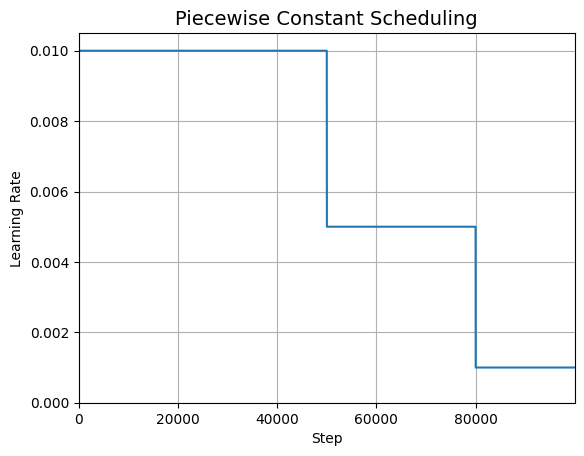

In [18]:

boundaries = [50_000, 80_000]
values = [0.01, 0.005, 0.001]

steps = np.arange(100_000)

lrs = np.full(len(steps), values[0])
for boundary, value in zip(boundaries, values[1:]):
    lrs[boundary:] = value

plt.plot(steps, lrs, "-")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

# 4. Performance Scheduling

Drop lr when loss is not dropping

In [19]:
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [22]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=2)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2550 - accuracy: 0.9036 - val_loss: 0.3376 - val_accuracy: 0.8816 - lr: 0.1000
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2474 - accuracy: 0.9066 - val_loss: 0.3481 - val_accuracy: 0.8752 - lr: 0.1000
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2394 - accuracy: 0.9085 - val_loss: 0.3395 - val_accuracy: 0.8826 - lr: 0.1000
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2046 - accuracy: 0.9221 - val_loss: 0.3225 - val_accuracy: 0.8880 - lr: 0.0500
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1962 - accuracy: 0.9245 - val_loss: 0.3159 - val_accuracy: 0.8872 - lr: 0.0500
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1920 - accuracy: 0.9264 - val_loss: 0.3215 - val_accuracy: 0.8868 - lr: 0.0500
Epoch 7/10
1719/1719 [==============================] - 3s

Learning rate and validation loss plot

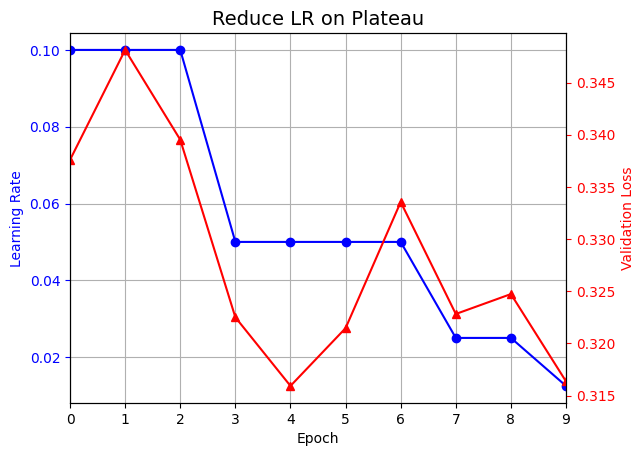

In [23]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()